# 로지스틱 회귀

## 데이터 준비

In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [3]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']]
fish_input.head()

,Weight,Length,Diagonal,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340


In [4]:
fish_target = fish['Species']
fish_target.head()

,Species
0,Bream
1,Bream
2,Bream
3,Bream
4,Bream


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [7]:
print(kn.classes_)  # 타깃값이 자동으로 알파벳 순으로 매겨짐

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [8]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [9]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])  # predict_proba(): 클래스별 확률값을 반환
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [10]:
# 4번째 샘플의 최근접 이웃의 클래스 확인
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target.iloc[indexes[0]])

52     Roach
106    Perch
103    Perch
Name: Species, dtype: object


## 로지스틱 회귀

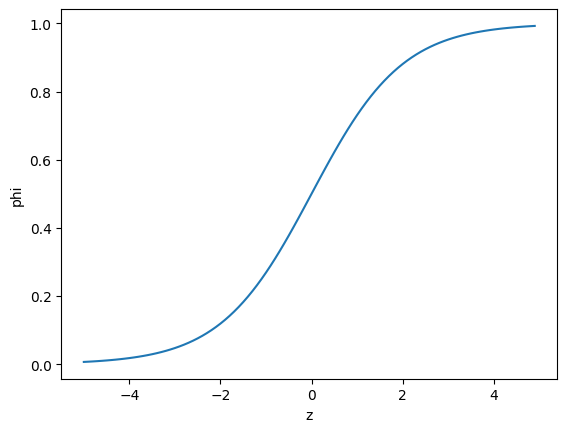

In [11]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

### 로지스틱 회귀로 이진 분류 수행

In [12]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)
print(lr.predict(train_bream_smelt[:5]))
print(lr.predict_proba(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [14]:
# 계수 확인
print(lr.coef_, lr.intercept_)

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


In [15]:
# z값 출력
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


In [16]:
# 확률 계산
from scipy.special import expit
print(expit(decisions))

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


### 로지스틱 회귀로 다중 분류 수행

In [17]:
lr = LogisticRegression(C=20, max_iter=1000)  # C: 규제를 제어, max_iter:
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [18]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [19]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [20]:
# 다중 분류는 클래스마다 z값을 하나씩 계산
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


In [21]:
# z값 출력 -> 다중 분류는 소프트맥스 함수를 사용하여 7개의 z 값을 확률로 변환. 이진 분류는 시그모이드 함수
decision = lr.decision_function(train_bream_smelt[:5])
print(np.round(decision, decimals=2))

[[ 13.06   5.65  -3.37  -3.35   2.17 -20.8    6.65]
 [-11.89   2.32   5.39  -3.19   3.2    8.3   -4.13]
 [ 12.32   5.63  -4.68  -2.18   1.7  -17.26   4.48]
 [ 10.52   6.09  -4.82  -2.99   2.29 -14.86   3.78]
 [ 13.66   5.7   -4.27  -2.59   1.73 -20.11   5.88]]


In [22]:
# 확률 계산
from scipy.special import softmax

proba = softmax(decision, axis=1)  # axis 매개변수를 지정하지 않으면 배열 전체에 대해 소프트맥스를 계산
print(np.round(proba, decimals=3))

[[0.998 0.001 0.    0.    0.    0.    0.002]
 [0.    0.002 0.051 0.    0.006 0.941 0.   ]
 [0.998 0.001 0.    0.    0.    0.    0.   ]
 [0.987 0.012 0.    0.    0.    0.    0.001]
 [0.999 0.    0.    0.    0.    0.    0.   ]]


# 확률적 경사 하강법

## SGDClassifier

In [23]:
import pandas as pd

# 데이터 호출
fish = pd.read_csv('https://bit.ly/fish_csv_data')

# 입력 데이터
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']]

# 타깃 데이터
fish_target = fish['Species']

In [24]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler

# 훈련 세트와 테스트 세트의 특성을 표준화 전처리
# 훈련 세트에서 학습한 통계 값으로 테스트 세트도 변환
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [26]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=100, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7226890756302521
0.675


In [27]:
# 점진적 학습
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8991596638655462
0.925


## 에포크의 과대/과소적합

In [28]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)
train_score = []                  # 에포크마다의 훈련 세트에 대한 점수
test_score = []                   # 에포크마다의 테스트 세트에 대한 점수
classes = np.unique(train_target) # 7개 생선의 목록 생성

In [29]:
# 300번의 에포크 동안 훈련을 반복 진행
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

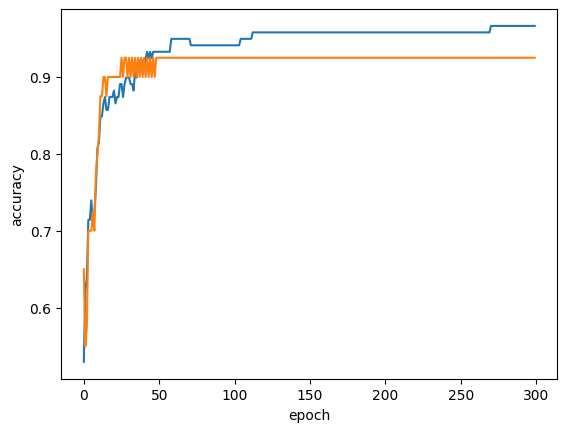

In [30]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [31]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [32]:
# 힌지 손실
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
